# Introduction, Objective and Dataset Description

### Problem

Predicting student performance based on behavioral and demographic data from an LMS


### Goal


Identify factors influencing performance and build a predictive model

### Dataset Information


This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. 
Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. 
Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, 
which is called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) 
that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. 
The experience API helps the learning activity providers to determine the learner, activity and objects 
that describe a learning experience.

The dataset consists of 480 student records and 16 features. 
The features are classified into three major categories: 
(1) Demographic features such as gender and nationality. 
(2) Academic background features such as educational stage, grade Level and section. 
(3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. 

The students come from different origins such as 
- 179 students are from Kuwait, 
- 172 students are from Jordan, 
- 28 students from Palestine, 
- 22 students are from Iraq, 
- 17 students from Lebanon, 
- 12 students from Tunis, 
- 11 students from Saudi Arabia, 
- 9 students from Egypt, 
- 7 students from Syria, 
- 6 students from USA, Iran and Libya, 
- 4 students from Morocco and 
- 1 student from Venezuela.

The dataset is collected through two educational semesters: 
245 student records are collected during the 1st semester and 
235 student records are collected during the 2nd semester.

The data set includes also the school attendance feature such as the students are classified into two categories 
based on their absence days: 

191 students exceed 7 absence days and 
289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent participation in the educational process. 
Parent participation feature has two sub features: 

1) Parent Answering Survey and 
2) Parent School Satisfaction. 

- There are 270 of the parents answered survey and 
- 210 are not, 

- 292 of the parents are satisfied from the school and 
- 188 are not.

### Attributes


1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
lower level: 199 students
middle level: 248 students
high level: 33 students

5 Grade Levels- grade student belongs 
(nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

Primary Years G1-G5 · 
Middle Years G6-G8 · 
IGCSE G9-G10 · 
Diploma G11-G12

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)
Section A: 283 students
Section B: 167 students
Section C: 30 students

7 Topic- course topic 
(nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’). Students through these different semesters take different topics.

- 245 student's record collected during the first semester
- 235 student's record collected during the second semester
    

9 Parent responsible for student (nominal:’mom’,’father’)

    Each student in the data set is followed up by a different parent as follows:
    Students followed by their fathers: 283
    Students followed by their mothers: 197

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)
Y: 270
N: 210

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)
Y: 292
N: 188

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

- more than 7 days: 191 students
- less than 7 days: 289 students

The students are classified into three numerical intervals based on their total grade/mark:
- Low-Level: interval includes values from 0 to 69 => 127 students
- Middle-Level: interval includes values from 70 to 89 => 211 students
- High-Level: interval includes values from 90-100 => 142 students

# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import plotly.express as px
import warnings
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV



In [3]:
df0 = pd.read_csv('xAPI-Edu-Data.csv')

In [4]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [5]:
df2 = pd.read_csv('xAPI-Edu-Data.csv')

In [6]:
df2.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
df2["Relation"].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [8]:
df2["Semester"].value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [9]:
df2.shape

(480, 17)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [11]:
df2.isnull().sum().sum()

0

In [12]:
print(df.iloc[:,-1].value_counts())

"""
M    211 (43.96%)
H    142 (29.58%)
L    127 (26.46%)

This means the dataset is not perfectly balanced, but it’s not highly imbalanced either.
The difference between the largest and smallest classes is approximately 17%, which is not severe.

For models sensitive to class imbalance (like NN) I could oversample (SMOTE) or undersample.
For less sensitive models (e.g. tree-based models like Random Forest or XGBoost) the slight imbalance may not require adjustment.
"""

M    211
H    142
L    127
Name: Class, dtype: int64


'\nM    211 (43.96%)\nH    142 (29.58%)\nL    127 (26.46%)\n\nThis means the dataset is not perfectly balanced, but it’s not highly imbalanced either.\nThe difference between the largest and smallest classes is approximately 17%, which is not severe.\n\nFor models sensitive to class imbalance (like NN) I could oversample (SMOTE) or undersample.\nFor less sensitive models (e.g. tree-based models like Random Forest or XGBoost) the slight imbalance may not require adjustment.\n'

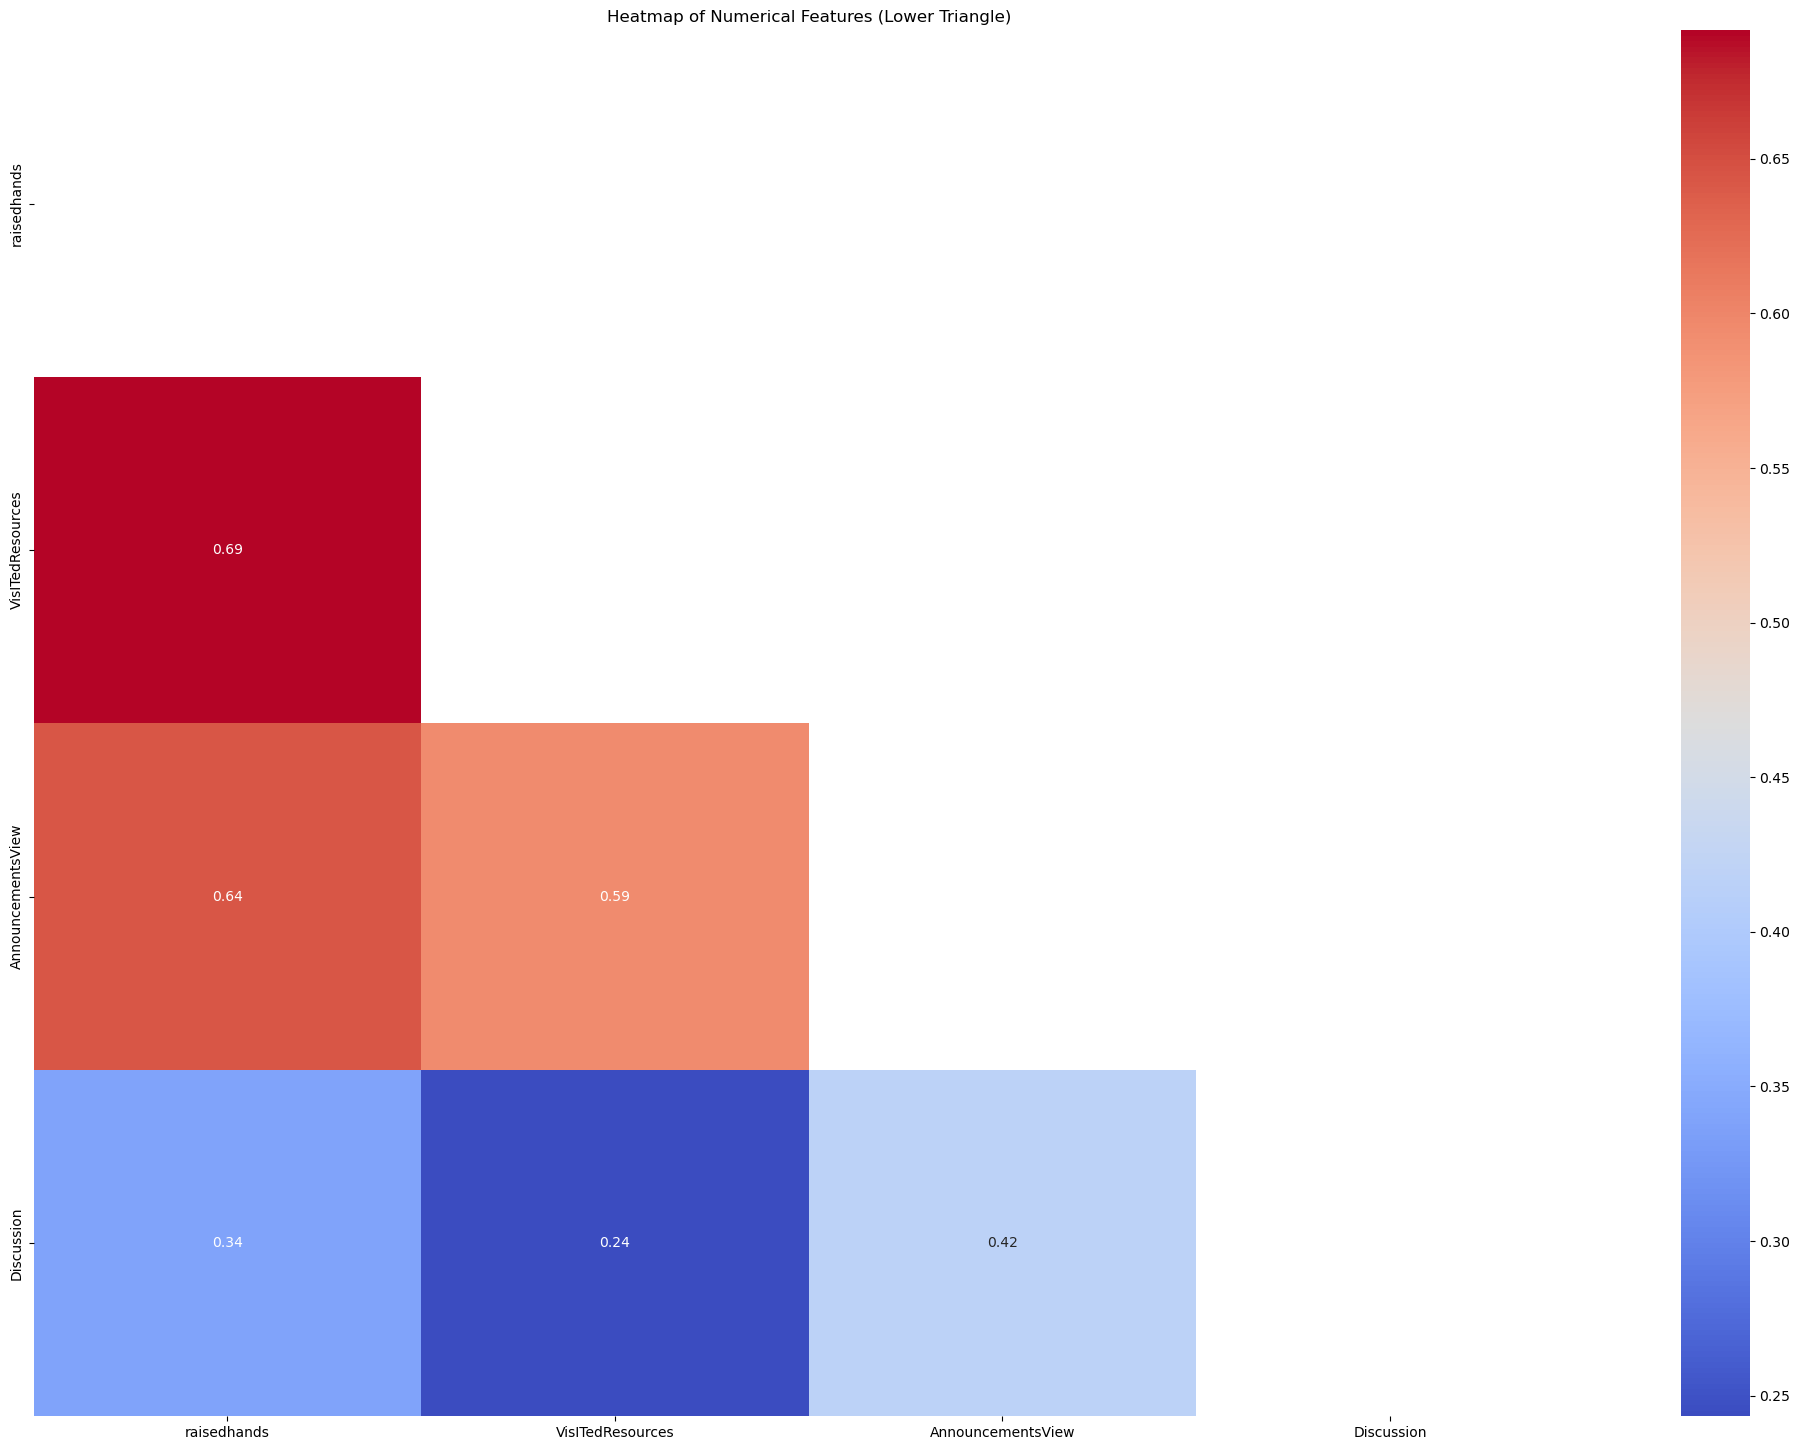

'\nVisITedResources and AnnouncementsView have a high correlation of 0.69. \nThis suggests a strong relationship between how often a student visits resources \nand views announcements.\n\nOther variables like Discussion and raisedhands seem to have lower correlations \nwith each other and with other variables, \nindicating more independence.\n'

In [13]:
# Compute the correlation matrix
corr = df2.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25,18))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', ax=ax)

plt.title("Heatmap of Numerical Features (Lower Triangle)")
plt.show()

"""
VisITedResources and AnnouncementsView have a high correlation of 0.69. 
This suggests a strong relationship between how often a student visits resources 
and views announcements.

Other variables like Discussion and raisedhands seem to have lower correlations 
with each other and with other variables, 
indicating more independence.
"""

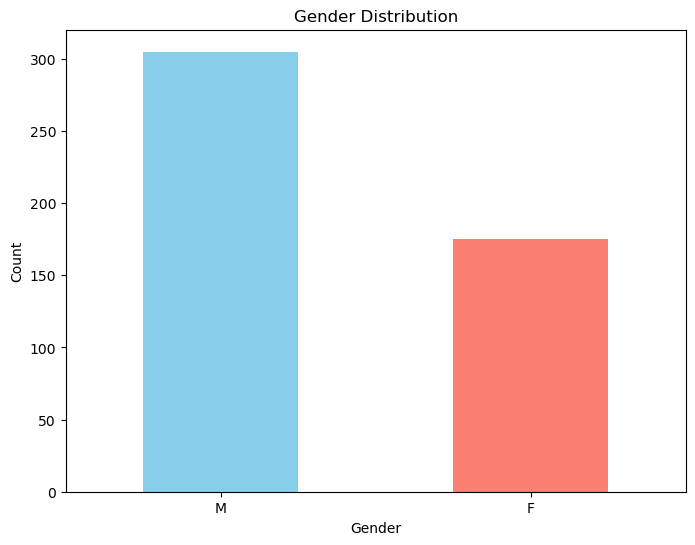

In [14]:
# Bar plot for gender counts
plt.figure(figsize=(8, 6))
df2['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

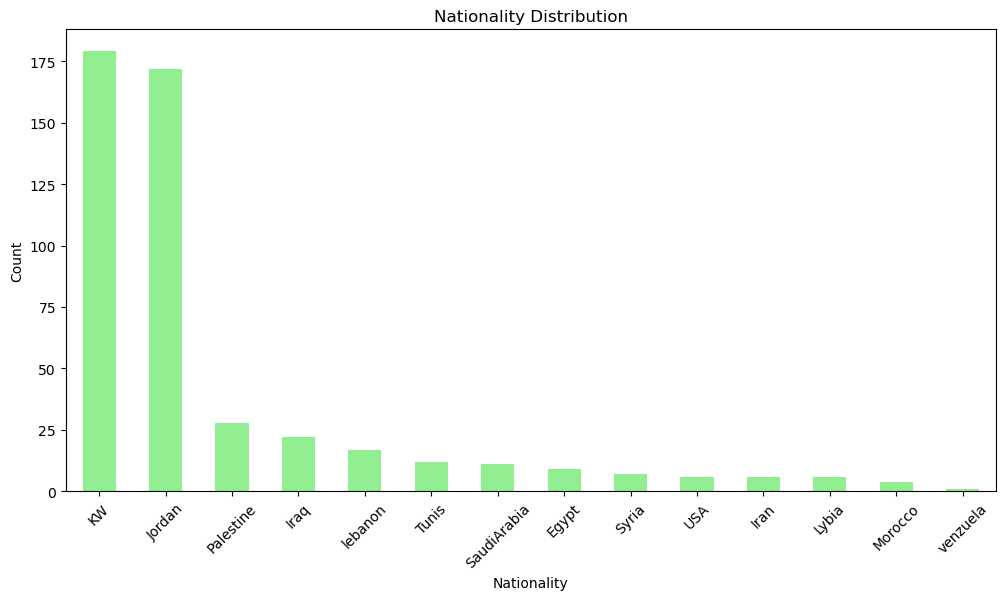

In [15]:
# Bar plot for nationalities
plt.figure(figsize=(12, 6))
df2['NationalITy'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

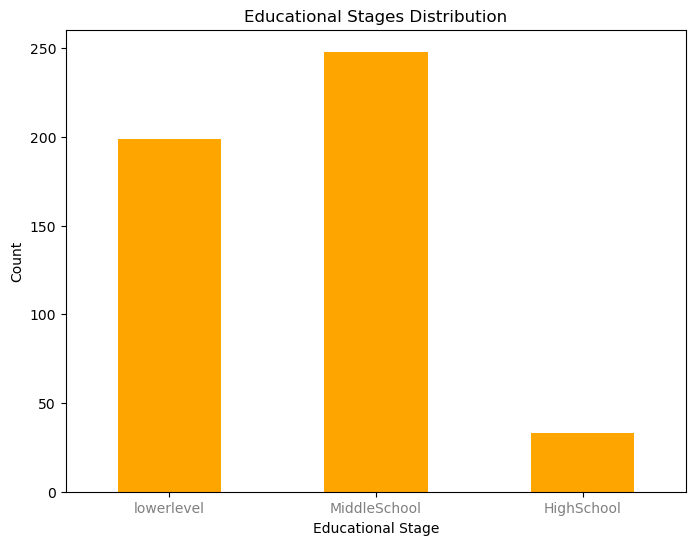

In [16]:
# Bar plot for educational stages

# Ensure the categories are in the desired order
stage_order = ['lowerlevel', 'MiddleSchool', 'HighSchool']
stage_counts = df2['StageID'].value_counts().reindex(stage_order)

plt.figure(figsize=(8, 6))
stage_counts.plot(kind='bar', color='orange')
plt.title('Educational Stages Distribution')
plt.xlabel('Educational Stage')
plt.ylabel('Count')
plt.xticks(rotation=0, color='grey')
plt.show()

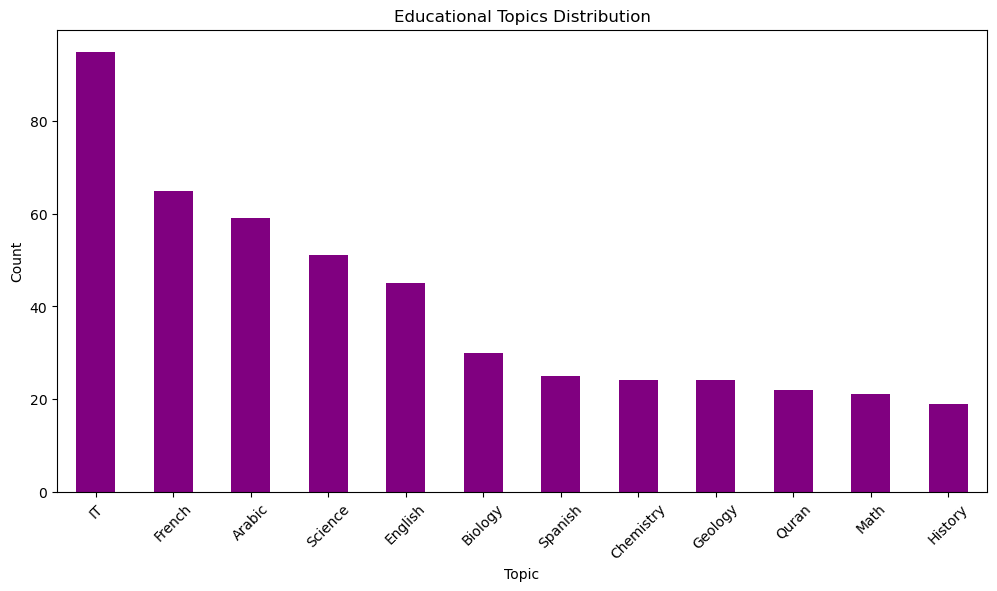

In [17]:
# Bar plot for educational topics
plt.figure(figsize=(12, 6))
df2['Topic'].value_counts().plot(kind='bar', color='purple')
plt.title('Educational Topics Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

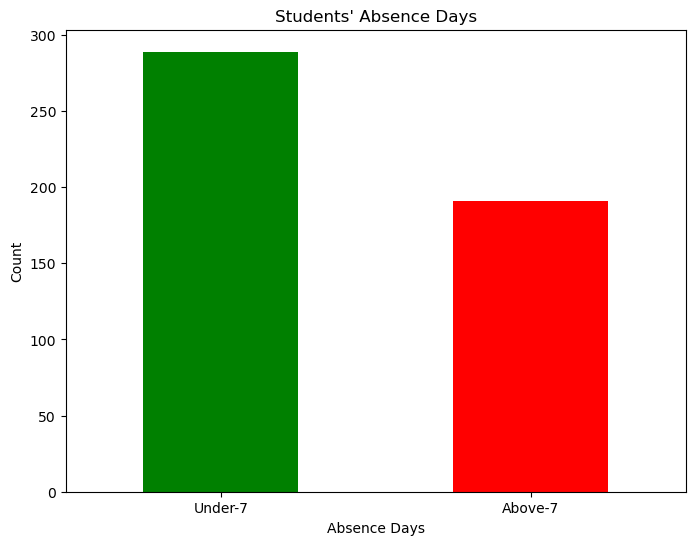

In [18]:
# Bar plot for students' absence days
plt.figure(figsize=(8, 6))
df2['StudentAbsenceDays'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Students' Absence Days")
plt.xlabel('Absence Days')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
from ydata_profiling import ProfileReport

# Create the profile report
profile = ProfileReport(df2, title="Dataset Profiling Report", explorative=True)



In [20]:
# Display the report inline in the Jupyter Notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data preprocessing

### Duplicates

In [22]:
# Find duplicate rows
duplicates = df2[df2.duplicated()]

# Display duplicate rows
print(duplicates) # They are actually near-duplicates

    gender NationalITy PlaceofBirth     StageID GradeID SectionID   Topic  \
326      M      Jordan       Jordan  lowerlevel    G-02         A  French   
327      M      Jordan       Jordan  lowerlevel    G-02         A  French   

    Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
326        F   Father           10                15                 10   
327        S   Father           30                10                 20   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
326          21                    No                      Bad   
327           5                    No                      Bad   

    StudentAbsenceDays Class  
326            Above-7     L  
327            Above-7     L  


### Handle Correlations - Feature Engineering

In [23]:
df2['TotalEngagement'] = df2['AnnouncementsView'] + df2['VisITedResources']
df2 = df2.drop(['AnnouncementsView', 'VisITedResources'], axis=1)

In [24]:
# GradeID is more granular, and StageID groups grades into stages. Retaining StageID as simpler analysis is sufficient.

df2 = df2.drop(columns=['GradeID'])

In [25]:
# NationalITy and PlaceofBirth are effectively the same. Retaining Nationality, which is likely more informative.

df2 = df2.drop(columns=['PlaceofBirth'])

In [26]:
# Map categorical values to numeric
df2['ParentAnsweringSurvey'] = df2['ParentAnsweringSurvey'].map({'Yes': 1, 'No': 0})
df2['ParentschoolSatisfaction'] = df2['ParentschoolSatisfaction'].map({'Good': 1, 'Bad': 0})

df2['ParentInvolvement'] = df2['ParentAnsweringSurvey'] + df2['ParentschoolSatisfaction']
df2 = df2.drop(['ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis=1)

"""
2: High involvement (e.g., Yes for survey and Good for satisfaction).
1: Partial involvement (e.g., Yes for survey but Bad for satisfaction).
0: Low involvement (e.g., No for survey and Bad for satisfaction).
"""

'\n2: High involvement (e.g., Yes for survey and Good for satisfaction).\n1: Partial involvement (e.g., Yes for survey but Bad for satisfaction).\n0: Low involvement (e.g., No for survey and Bad for satisfaction).\n'

In [27]:
df2.head(20)

,gender,NationalITy,StageID,SectionID,Topic,Semester,Relation,raisedhands,Discussion,StudentAbsenceDays,Class,TotalEngagement,ParentInvolvement
0,M,KW,lowerlevel,A,IT,F,Father,15,20,Under-7,M,18,2
1,M,KW,lowerlevel,A,IT,F,Father,20,25,Under-7,M,23,2
2,M,KW,lowerlevel,A,IT,F,Father,10,30,Above-7,L,7,0
3,M,KW,lowerlevel,A,IT,F,Father,30,35,Above-7,L,30,0
4,M,KW,lowerlevel,A,IT,F,Father,40,50,Above-7,M,62,0
5,F,KW,lowerlevel,A,IT,F,Father,42,70,Above-7,M,43,1
6,M,KW,MiddleSchool,A,Math,F,Father,35,17,Above-7,L,12,0
7,M,KW,MiddleSchool,A,Math,F,Father,50,22,Under-7,M,25,2
8,F,KW,MiddleSchool,A,Math,F,Father,12,50,Under-7,M,37,2
9,F,KW,MiddleSchool,B,IT,F,Father,70,70,Under-7,M,105,2


In [28]:
"""
Class <-> StudentAbsenceDays: this is expected since student performance often correlates with attendance. 
Retaining both for modeling but should avoid using them together in certain analyses.

SectionID <-> Topic: Classrooms (SectionID) are often topic-specific. 
Should assess if one offers more predictive power and drop one if necessary.

Semester <-> Topic: Different semesters focus on different topics. 
Retaining both unless I find a direct redundancy in exploratory analysis.
"""

'\nClass <-> StudentAbsenceDays: this is expected since student performance often correlates with attendance. \nRetaining both for modeling but should avoid using them together in certain analyses.\n\nSectionID <-> Topic: Classrooms (SectionID) are often topic-specific. \nShould assess if one offers more predictive power and drop one if necessary.\n\nSemester <-> Topic: Different semesters focus on different topics. \nRetaining both unless I find a direct redundancy in exploratory analysis.\n'

### Detecting and handling  any outliers

In [29]:
"""
Isolation Forest should be applied to the X data (features) only, 
without the target column (Class). This is because:

Unsupervised Nature:
Isolation Forest is an unsupervised algorithm that identifies anomalies in the feature space. 
Including the target (Class) could bias the detection.

Data Integrity:
The target column (Class) is the variable we want to predict and should not influence the outlier detection process.
"""

'\nIsolation Forest should be applied to the X data (features) only, \nwithout the target column (Class). This is because:\n\nUnsupervised Nature:\nIsolation Forest is an unsupervised algorithm that identifies anomalies in the feature space. \nIncluding the target (Class) could bias the detection.\n\nData Integrity:\nThe target column (Class) is the variable we want to predict and should not influence the outlier detection process.\n'

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              480 non-null    object
 1   NationalITy         480 non-null    object
 2   StageID             480 non-null    object
 3   SectionID           480 non-null    object
 4   Topic               480 non-null    object
 5   Semester            480 non-null    object
 6   Relation            480 non-null    object
 7   raisedhands         480 non-null    int64 
 8   Discussion          480 non-null    int64 
 9   StudentAbsenceDays  480 non-null    object
 10  Class               480 non-null    object
 11  TotalEngagement     480 non-null    int64 
 12  ParentInvolvement   480 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 48.9+ KB


In [31]:
# Select numerical features
numerical_features = ['raisedhands', 'TotalEngagement', 'ParentInvolvement', 'Discussion']

In [32]:
# Define feature matrix (X) with numerical features only
X = df2[numerical_features]

In [33]:
X.head()

,raisedhands,TotalEngagement,ParentInvolvement,Discussion
0,15,18,2,20
1,20,23,2,25
2,10,7,0,30
3,30,30,0,35
4,40,62,0,50


In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [36]:
iso = IsolationForest(contamination=0.05, random_state=42)

In [37]:
# Fit Isolation Forest and predict outliers
outlier_labels = iso.fit_predict(X)

In [38]:
# Add outlier labels to the dataset
df2['outlier'] = outlier_labels

In [39]:
df2.head(30)

,gender,NationalITy,StageID,SectionID,Topic,Semester,Relation,raisedhands,Discussion,StudentAbsenceDays,Class,TotalEngagement,ParentInvolvement,outlier
0,M,KW,lowerlevel,A,IT,F,Father,15,20,Under-7,M,18,2,1
1,M,KW,lowerlevel,A,IT,F,Father,20,25,Under-7,M,23,2,1
2,M,KW,lowerlevel,A,IT,F,Father,10,30,Above-7,L,7,0,1
3,M,KW,lowerlevel,A,IT,F,Father,30,35,Above-7,L,30,0,1
4,M,KW,lowerlevel,A,IT,F,Father,40,50,Above-7,M,62,0,1
5,F,KW,lowerlevel,A,IT,F,Father,42,70,Above-7,M,43,1,1
6,M,KW,MiddleSchool,A,Math,F,Father,35,17,Above-7,L,12,0,1
7,M,KW,MiddleSchool,A,Math,F,Father,50,22,Under-7,M,25,2,1
8,F,KW,MiddleSchool,A,Math,F,Father,12,50,Under-7,M,37,2,1
9,F,KW,MiddleSchool,B,IT,F,Father,70,70,Under-7,M,105,2,1


In [40]:
# Separate outliers and inliers
outliers = df2[df2['outlier'] == -1]
inliers = df2[df2['outlier'] == 1]

In [41]:
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 24


In [42]:
# Keeping only the rows labeled as 1 (inliers) | "dfc" for df_cleaned

dfc = df2[df2['outlier'] == 1].drop(columns=['outlier'])

In [43]:
df2.shape

(480, 14)

In [44]:
dfc.shape

(456, 13)

### Data transformation

In [99]:
"""
ENCODING
SPLITING DATA
SMOTE
FEATURE SELECTION
SCALING
MODELING
"""

'\nENCODING\nSPLITING DATA\nSMOTE\nFEATURE SELECTION\nSCALING\nMODELING\n'

In [46]:
dfc.head()

,gender,NationalITy,StageID,SectionID,Topic,Semester,Relation,raisedhands,Discussion,StudentAbsenceDays,Class,TotalEngagement,ParentInvolvement
0,M,KW,lowerlevel,A,IT,F,Father,15,20,Under-7,M,18,2
1,M,KW,lowerlevel,A,IT,F,Father,20,25,Under-7,M,23,2
2,M,KW,lowerlevel,A,IT,F,Father,10,30,Above-7,L,7,0
3,M,KW,lowerlevel,A,IT,F,Father,30,35,Above-7,L,30,0
4,M,KW,lowerlevel,A,IT,F,Father,40,50,Above-7,M,62,0


In [47]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              456 non-null    object
 1   NationalITy         456 non-null    object
 2   StageID             456 non-null    object
 3   SectionID           456 non-null    object
 4   Topic               456 non-null    object
 5   Semester            456 non-null    object
 6   Relation            456 non-null    object
 7   raisedhands         456 non-null    int64 
 8   Discussion          456 non-null    int64 
 9   StudentAbsenceDays  456 non-null    object
 10  Class               456 non-null    object
 11  TotalEngagement     456 non-null    int64 
 12  ParentInvolvement   456 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 49.9+ KB


In [48]:
dfc_copy = dfc.copy()

In [49]:
# To proceed with the classification labels have to be transformed to integers

# Ordinal features: the order matters. Numerical encoding reflects this order.
# Nominal features: no inherent order. Encoding does not imply any rank or order.

# Label Encoding for binary or ordinal features
label_cols = ['gender', 'StudentAbsenceDays', 'Class', 'Semester', 'Relation']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    dfc[col] = le.fit_transform(dfc[col])
    label_encoders[col] = le

# One-Hot Encoding for nominal categorical features
onehot_cols = ['NationalITy', 'StageID', 'SectionID', 'Topic']
dfc = pd.get_dummies(dfc, columns=onehot_cols, drop_first=True)

# Check the transformed dataset
print(dfc.head())

   gender  Semester  Relation  raisedhands  Discussion  StudentAbsenceDays  \
0       1         0         0           15          20                   1   
1       1         0         0           20          25                   1   
2       1         0         0           10          30                   0   
3       1         0         0           30          35                   0   
4       1         0         0           40          50                   0   

   Class  TotalEngagement  ParentInvolvement  NationalITy_Iran  ...  \
0      2               18                  2                 0  ...   
1      2               23                  2                 0  ...   
2      1                7                  0                 0  ...   
3      1               30                  0                 0  ...   
4      2               62                  0                 0  ...   

   Topic_Chemistry  Topic_English  Topic_French  Topic_Geology  Topic_History  \
0                0     

In [50]:
dfc.shape

(456, 37)

# Split Data

In [51]:
"""
To avoid data leakage, we ensure that the test set is untouched by preprocessing steps 
like SMOTE, scaling, or feature selection.
"""

'\nTo avoid data leakage, we ensure that the test set is untouched by preprocessing steps \nlike SMOTE, scaling, or feature selection.\n'

In [52]:
# Separate features (X) and target (y)
X = dfc.drop(columns=['Class'])
y = dfc['Class']

In [53]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE

In [54]:
smote = SMOTE(random_state=42)

In [55]:
# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Selection

In [56]:
"""
Feature selection should be based on the balanced training data 
to ensure that the selected features are relevant for all classes.
Highlight the most important features used in your model.

Feature selection after encoding => use model-based methods to select the most 
relevant columns. This works well with tree-based models like Random Forest or Gradient Boosting.

(Feature selection before encoding => filter-based methods (e.g. correlation, mutual information))
"""

'\nFeature selection should be based on the balanced training data \nto ensure that the selected features are relevant for all classes.\nHighlight the most important features used in your model.\n\nFeature selection after encoding => use model-based methods to select the most \nrelevant columns. This works well with tree-based models like Random Forest or Gradient Boosting.\n\n(Feature selection before encoding => filter-based methods (e.g. correlation, mutual information))\n'

In [57]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [58]:
warnings.filterwarnings("ignore", message="X has feature names, but SelectFromModel was fitted without feature names")


In [59]:
# Select important features
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train_balanced)
X_test_selected = selector.transform(X_test)

In [60]:
# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Map the mask to feature names
selected_features = X_train_balanced.columns[selected_features_mask]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['gender', 'Relation', 'raisedhands', 'Discussion', 'StudentAbsenceDays',
       'TotalEngagement', 'ParentInvolvement'],
      dtype='object')


In [61]:
"""
Selected Features:
Index(['gender', 'Relation', 'raisedhands', 'Discussion', 'StudentAbsenceDays',
       'TotalEngagement', 'ParentInvolvement'],
"""

"\nSelected Features:\nIndex(['gender', 'Relation', 'raisedhands', 'Discussion', 'StudentAbsenceDays',\n       'TotalEngagement', 'ParentInvolvement'],\n"

In [62]:
type(X_train_selected)

numpy.ndarray

# Scaling

In [63]:
scaler = StandardScaler()

In [64]:
# Scale training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Scale test data
X_test_scaled = scaler.transform(X_test_selected)

# Cross-Validation for Each Model

In [65]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
cv_results = {}

In [67]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [68]:
# Iterate over models
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    # Accuracy
    accuracy_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')
    # Recall
    recall_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='recall_weighted')
    # Precision
    precision_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='precision_weighted')
    # F1 Score
    f1_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='f1_weighted')
    
    # Store mean and std dev of all metrics
    cv_results[model_name] = {
        'Mean Accuracy': accuracy_scores.mean(),
        'Std Accuracy': accuracy_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean F1 Score': f1_scores.mean(),
        'Std F1 Score': f1_scores.std()
    }

# Convert results to a DataFrame
cv_results_df = pd.DataFrame.from_dict(cv_results, orient='index')

Cross-validating Logistic Regression...
Cross-validating SVM...
Cross-validating KNN...
Cross-validating XGBoost...
Cross-validating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 386, number of used features: 7
[LightGBM] [Info] Start training from score -1.096025
[LightGBM] [Info] Start training from score -1.096025
[LightGBM] [Info] Start training from score -1.103807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [69]:
cv_results_df

,Mean Accuracy,Std Accuracy,Mean Recall,Std Recall,Mean Precision,Std Precision,Mean F1 Score,Std F1 Score
Logistic Regression,0.763875,0.040601,0.763875,0.040601,0.763752,0.041397,0.759866,0.041489
SVM,0.763918,0.034576,0.763918,0.034576,0.761544,0.034623,0.756879,0.037083
KNN,0.759858,0.019725,0.759858,0.019725,0.758232,0.017024,0.754856,0.018541
XGBoost,0.788896,0.039064,0.788896,0.039064,0.791288,0.037130,0.786507,0.039100
LightGBM,0.788875,0.047499,0.788875,0.047499,0.791461,0.049317,0.785710,0.049927


### Interpretation

In [70]:
"""
XGBoost (F1 = 0.7865) and LightGBM (F1 = 0.7857):
These models achieved the highest Mean F1 Scores, 
suggesting they are the most effective in balancing precision and recall.

Logistic Regression (F1 = 0.7599):
Performs surprisingly well for a simple linear model, 
indicating that the relationships in the data may not require highly complex models.

SVM (F1 = 0.7569):
Comparable to Logistic Regression, but with a slightly lower F1 score. 
The small margin might not justify the higher computational cost of SVM.

KNN (F1 = 0.7549):
While slightly weaker than other models, its performance is still competitive. 
However, KNN can struggle with scalability, so it may not be ideal for larger datasets.

Standard Deviation:
Lower standard deviation values (e.g., KNN: 0.0185) indicate more stable performance across folds, 
whereas higher values (e.g., LightGBM: 0.0499) suggest the model might be more sensitive to data splits.

"""

'\nXGBoost (F1 = 0.7865) and LightGBM (F1 = 0.7857):\nThese models achieved the highest Mean F1 Scores, \nsuggesting they are the most effective in balancing precision and recall.\n\nLogistic Regression (F1 = 0.7599):\nPerforms surprisingly well for a simple linear model, \nindicating that the relationships in the data may not require highly complex models.\n\nSVM (F1 = 0.7569):\nComparable to Logistic Regression, but with a slightly lower F1 score. \nThe small margin might not justify the higher computational cost of SVM.\n\nKNN (F1 = 0.7549):\nWhile slightly weaker than other models, its performance is still competitive. \nHowever, KNN can struggle with scalability, so it may not be ideal for larger datasets.\n\nStandard Deviation:\nLower standard deviation values (e.g., KNN: 0.0185) indicate more stable performance across folds, \nwhereas higher values (e.g., LightGBM: 0.0499) suggest the model might be more sensitive to data splits.\n\n'

### Fine-Tune the Top Models

In [71]:
# Define hyperparameter grids for each model
param_grids = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'num_leaves': [31, 50, 70],
        'learning_rate': [0.01, 0.1, 0.5],
        'min_child_samples': [10, 20, 30]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],  # 'l1' requires solver='liblinear'
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3],  # Relevant only for 'poly' kernel
        'gamma': ['scale', 'auto']  # Relevant only for 'rbf' and 'poly'
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}


# Initialize a dictionary to store the best parameters and scores
grid_search_results = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='f1_weighted',
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    grid_search.fit(X_train_scaled, y_train_balanced)
    
    # Store results
    grid_search_results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Best F1 Score': grid_search.best_score_
    }

# Convert results to DataFrame
grid_search_results_df = pd.DataFrame.from_dict(grid_search_results, orient='index')


Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Performing GridSearchCV for SVM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performing GridSearchCV for KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Performing GridSearchCV for LightGBM...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 7
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training f

In [72]:
# Increase column width to display full content
pd.set_option('display.max_colwidth', None)

In [73]:
grid_search_results_df

,Best Parameters,Best F1 Score
Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.770168
SVM,"{'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}",0.785418
KNN,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",0.794022
XGBoost,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}",0.807385
LightGBM,"{'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31}",0.795837


# Modeling and Results

In [74]:
# Initialize the best XGBoost model
xgb_best = XGBClassifier(
    learning_rate=0.01, 
    max_depth=5, 
    n_estimators=50, 
    subsample=1.0, 
    use_label_encoder=False,  # Avoids deprecation warnings
    eval_metric='logloss',    # Required for classification tasks
    random_state=42
)

# Initialize the best LightGBM model
lgbm_best = LGBMClassifier(
    learning_rate=0.1, 
    min_child_samples=20, 
    n_estimators=100, 
    num_leaves=31, 
    random_state=42
)

# Logistic Regression
log_reg_best = LogisticRegression(
    C=1, 
    penalty='l1', 
    solver='saga', 
    max_iter=1000, 
    random_state=42
)

# SVM
svm_best = SVC(
    C=10, 
    degree=3, 
    gamma='auto', 
    kernel='poly', 
    probability=True,  # Enable probability outputs for evaluation
    random_state=42
)

# KNN
knn_best = KNeighborsClassifier(
    metric='euclidean', 
    n_neighbors=5, 
    weights='distance'
)


In [75]:
models_tuned = {
    'Logistic Regression': log_reg_best,
    'SVM': svm_best,
    'KNN': knn_best,
    'XGBoost': xgb_best,
    'LightGBM': lgbm_best
}

In [76]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Compute metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    return metrics

In [77]:
# Dictionary to store results
results = {}

# Iterate over models and evaluate
for model_name, model in models_tuned.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train_scaled, y_train_balanced, X_test_scaled, y_test)
    results[model_name] = metrics

Evaluating Logistic Regression...
Evaluating SVM...
Evaluating KNN...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 7
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [78]:
# Create a DataFrame from the results dictionary
results_df2 = pd.DataFrame(results)

# Transpose to make metrics the rows and models the columns
results_df2 = results_df2.T

# Reset the index and rename columns for clarity
results_df2 = results_df2.reset_index()
results_df2.rename(columns={'index': 'Model'}, inplace=True)

# Transpose the table again to get the final format
results_df2 = results_df2.set_index('Model').T.reset_index()
results_df2.rename(columns={'index': 'Evaluation Measure'}, inplace=True)

# Remove the automatic row index
results_df2.index.name = None

results_df2

Model,Evaluation Measure,Logistic Regression,SVM,KNN,XGBoost,LightGBM
0,Accuracy,0.793478,0.750000,0.728261,0.673913,0.771739
1,Recall,0.793478,0.750000,0.728261,0.673913,0.771739
2,Precision,0.793307,0.751304,0.726480,0.678223,0.773913
3,F1 Score,0.790906,0.750139,0.726955,0.667493,0.771369


### Without tuning

In [79]:
results2 = {}

# Iterate over models and evaluate
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train_scaled, y_train_balanced, X_test_scaled, y_test)
    results2[model_name] = metrics


# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results2)

# Transpose to make metrics the rows and models the columns
results_df = results_df.T

# Reset the index and rename columns for clarity
results_df = results_df.reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Transpose the table again to get the final format
results_df = results_df.set_index('Model').T.reset_index()
results_df.rename(columns={'index': 'Evaluation Measure'}, inplace=True)

# Remove the automatic row index
results_df.index.name = None



Evaluating Logistic Regression...
Evaluating SVM...
Evaluating KNN...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 7
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [80]:
results_df

Model,Evaluation Measure,Logistic Regression,SVM,KNN,XGBoost,LightGBM
0,Accuracy,0.804348,0.771739,0.684783,0.750000,0.771739
1,Recall,0.804348,0.771739,0.684783,0.750000,0.771739
2,Precision,0.804558,0.772300,0.691921,0.752519,0.773913
3,F1 Score,0.802751,0.767233,0.686347,0.750627,0.771369


In [81]:
results_after_tuning = results_df2
results_df2

Model,Evaluation Measure,Logistic Regression,SVM,KNN,XGBoost,LightGBM
0,Accuracy,0.793478,0.750000,0.728261,0.673913,0.771739
1,Recall,0.793478,0.750000,0.728261,0.673913,0.771739
2,Precision,0.793307,0.751304,0.726480,0.678223,0.773913
3,F1 Score,0.790906,0.750139,0.726955,0.667493,0.771369


In [82]:
cv_results_df

,Mean Accuracy,Std Accuracy,Mean Recall,Std Recall,Mean Precision,Std Precision,Mean F1 Score,Std F1 Score
Logistic Regression,0.763875,0.040601,0.763875,0.040601,0.763752,0.041397,0.759866,0.041489
SVM,0.763918,0.034576,0.763918,0.034576,0.761544,0.034623,0.756879,0.037083
KNN,0.759858,0.019725,0.759858,0.019725,0.758232,0.017024,0.754856,0.018541
XGBoost,0.788896,0.039064,0.788896,0.039064,0.791288,0.037130,0.786507,0.039100
LightGBM,0.788875,0.047499,0.788875,0.047499,0.791461,0.049317,0.785710,0.049927


In [83]:
# Select common metrics: Accuracy, Recall, Precision, F1 Score
common_metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Prepare Validation Results
validation_results = cv_results_df[['Mean Accuracy', 'Mean Recall', 'Mean Precision', 'Mean F1 Score']].copy()
validation_results.columns = ['Accuracy', 'Recall', 'Precision', 'F1 Score']  # Rename for consistency
validation_results['Type'] = 'Validation'
validation_results = validation_results.reset_index().rename(columns={'index': 'Model'})

# Prepare Pre-Tuning Results
pre_tuning_results = results_df[results_df['Evaluation Measure'].isin(common_metrics)].copy()
pre_tuning_results['Type'] = 'Pre-Tuning'

# Prepare Post-Tuning Results
post_tuning_results = results_after_tuning[results_after_tuning['Evaluation Measure'].isin(common_metrics)].copy()
post_tuning_results['Type'] = 'Post-Tuning'

# Combine all results
# Validation results already have metrics as columns
validation_results_melted = validation_results.melt(
    id_vars=['Model', 'Type'], 
    value_vars=common_metrics,
    var_name='Metric',
    value_name='Score'
)

# Pre-Tuning Results: Keep models as columns and stack metrics
pre_tuning_results_melted = pre_tuning_results.melt(
    id_vars=['Evaluation Measure', 'Type'], 
    var_name='Model', 
    value_name='Score'
).rename(columns={'Evaluation Measure': 'Metric'})

# Post-Tuning Results: Same as pre-tuning
post_tuning_results_melted = post_tuning_results.melt(
    id_vars=['Evaluation Measure', 'Type'], 
    var_name='Model', 
    value_name='Score'
).rename(columns={'Evaluation Measure': 'Metric'})

# Concatenate Validation, Pre-Tuning, and Post-Tuning
combined_results_melted = pd.concat([
    validation_results_melted,
    pre_tuning_results_melted,
    post_tuning_results_melted
], axis=0)

# Pivot to have Models as columns and Metrics as rows, split by Type
final_combined_results = combined_results_melted.pivot_table(
    index=['Metric', 'Type'], 
    columns='Model', 
    values='Score'
)

# Display final results
final_combined_results

Model                       KNN  LightGBM  Logistic Regression       SVM  \
Metric    Type                                                             
Accuracy  Post-Tuning  0.728261  0.771739             0.793478  0.750000   
          Pre-Tuning   0.684783  0.771739             0.804348  0.771739   
          Validation   0.759858  0.788875             0.763875  0.763918   
F1 Score  Post-Tuning  0.726955  0.771369             0.790906  0.750139   
          Pre-Tuning   0.686347  0.771369             0.802751  0.767233   
          Validation   0.754856  0.785710             0.759866  0.756879   
Precision Post-Tuning  0.726480  0.773913             0.793307  0.751304   
          Pre-Tuning   0.691921  0.773913             0.804558  0.772300   
          Validation   0.758232  0.791461             0.763752  0.761544   
Recall    Post-Tuning  0.728261  0.771739             0.793478  0.750000   
          Pre-Tuning   0.684783  0.771739             0.804348  0.771739   
          Validation   0.759858  0.788875             0.763875  0.763918   

Model                   XGBoost  
Metric    Type                   
Accuracy  Post-Tuning  0.673913  
          Pre-Tuning   0.750000  
          Validation   0.788896  
F1 Score  Post-Tuning  0.667493  
          Pre-Tuning   0.750627  
          Validation   0.786507  
Precision Post-Tuning  0.678223  
          Pre-Tuning   0.752519  
          Validation   0.791288  
Recall    Post-Tuning  0.673913  
          Pre-Tuning   0.750000  
          Validation   0.788896

In [84]:
"""
Best Model:

LightGBM emerges as the best overall model due to its stability and competitive metrics across all stages.
Logistic Regression is a close second and offers simplicity, making it a good fallback option.
"""

'\nBest Model:\n\nLightGBM emerges as the best overall model due to its stability and competitive metrics across all stages.\nLogistic Regression is a close second and offers simplicity, making it a good fallback option.\n'

In [85]:
"""
Researchers' highest results were achieved by using ANN, Boosting and the following metrics:

Accuracy: 79.1
Recall: 79.2
Precision: 79.1
F-measure: 79.1

"""

"\nResearchers' highest results were achieved by using ANN, Boosting and the following metrics:\n\nAccuracy: 79.1\nRecall: 79.2\nPrecision: 79.1\nF-measure: 79.1\n\n"

In [86]:
"""
My Logistic Regression model post-tuning achieves comparable results 
to the authors' ANN and Boosting methods, 
especially in Accuracy and Recall.
"""

"\nMy Logistic Regression model post-tuning achieves comparable results \nto the authors' ANN and Boosting methods, \nespecially in Accuracy and Recall.\n"

# Insights

1. Engagement Features

    Features like raisedhands, Discussion, and TotalEngagement are positively correlated with academic performance.
    
    High performers (Class 2) tend to raise their hands more frequently, which suggests active participation correlates with better performance.
    Medium performers (Class 1) show the least engagement, with a lower median and tighter range.
    Surprisingly, some low performers (Class 0) raised their hands more than high performers, potentially indicating factors beyond participation impact performance.
    
    Moderate Participation in Discussions Correlates with Higher Performance: High performers (Class 2) show moderate engagement in discussions, suggesting quality or consistency of participation matters more than quantity.
    Over-Participation Doesn't Guarantee High Performance: Class 0 has the highest median for discussion participation, but this doesn’t translate into higher performance.
    Low Engagement is a Concern for Medium Performers: Class 1 has the lowest median and range for discussion participation, indicating that limited engagement may hinder performance.

    High Engagement Doesn't Guarantee High Performance: Class 0 (low performers) has a higher median engagement than Class 2, indicating that mere engagement without effectiveness or quality may not lead to better outcomes.
    Moderate Engagement Limits Performance: Class 1 has the lowest engagement levels, correlating with its middle performance.
    High Performers Exhibit Balanced Engagement: Class 2 students maintain a high but less extreme level of engagement compared to Class 0, suggesting quality engagement may matter more than quantity.

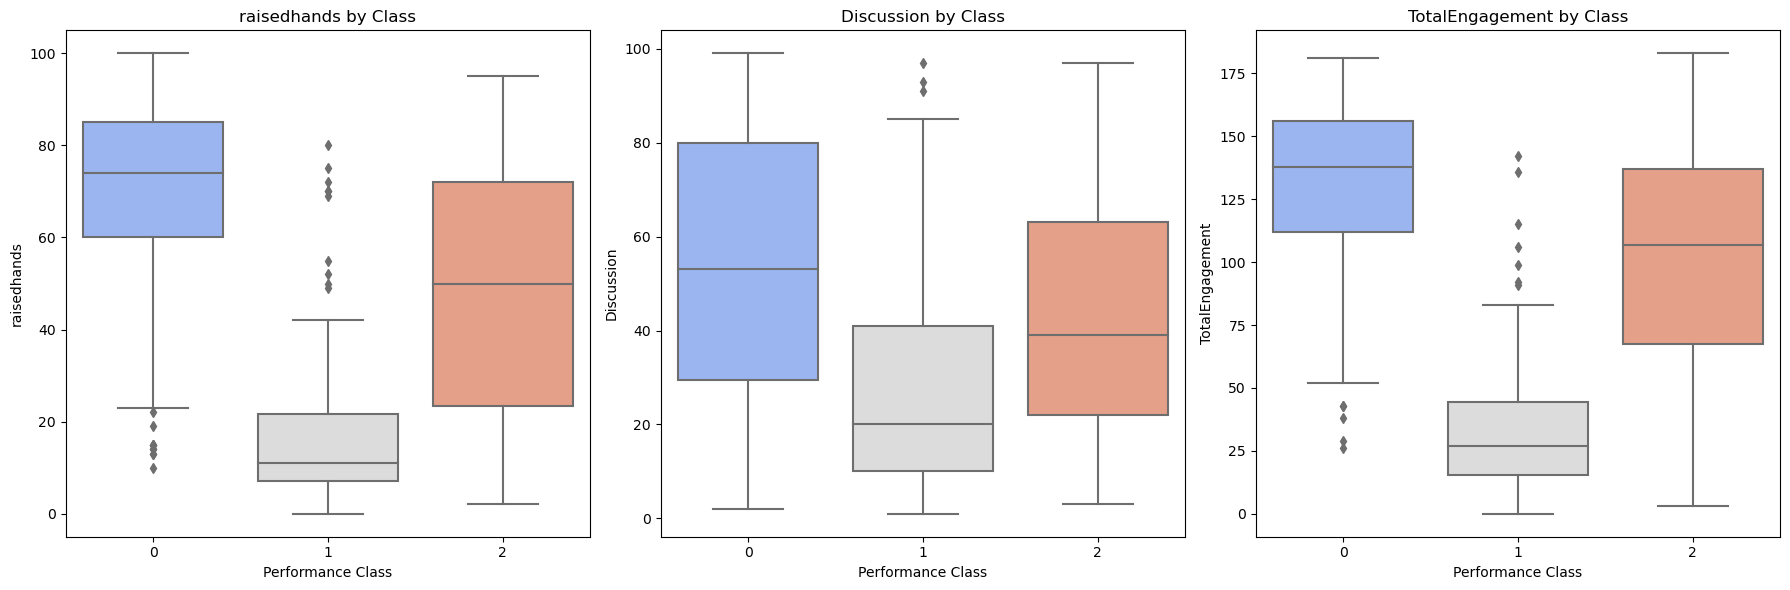

In [98]:
engagement_features = ['raisedhands', 'Discussion', 'TotalEngagement']

# Plot the boxplots
plt.figure(figsize=(18, 6))  # Adjust the figure size
for i, feature in enumerate(engagement_features, 1):
    if feature in dfc.columns:  # Ensure the feature exists in the dataframe
        plt.subplot(1, 3, i)  # Create subplots (1 row, 3 columns)
        sns.boxplot(data=dfc, x='Class', y=feature, palette='coolwarm')
        plt.title(f'{feature} by Class')  # Title for each subplot
        plt.xlabel('Performance Class')
        plt.ylabel(feature)
    else:
        print(f"Skipping feature '{feature}' as it is not in the dataframe.")

plt.tight_layout()
plt.show()

2. Parent Involvement

    The ParentAnsweringSurvey and ParentschoolSatisfaction features indicate that parental engagement correlates with higher student performance. Schools could prioritize initiatives to improve parental involvement.
    The observation that students in the lowest performance class (0) have significant parental involvement suggests that other factors (e.g., teaching quality, engagement, or personal challenges) could play a more critical role for these students. Thus, holistic interventions should be considered addressing parental involvement, engagement with classroom activities, attendance, and personalized support.

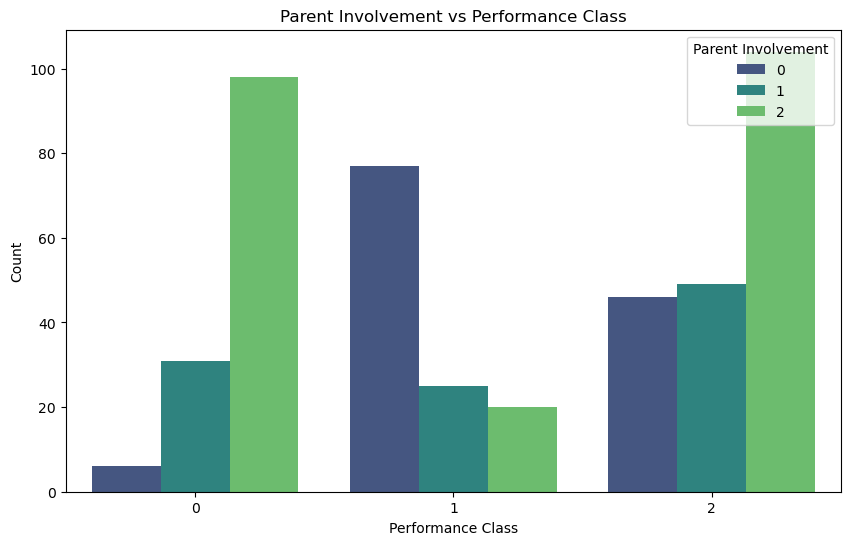

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfc, x='Class', hue='ParentInvolvement', palette='viridis')
plt.title('Parent Involvement vs Performance Class')
plt.xlabel('Performance Class')
plt.ylabel('Count')
plt.legend(title='Parent Involvement', loc='upper right')
plt.show()

3. Absence Patterns

    Students with fewer absence days (Under-7) tend to perform better. This suggests that attendance plays a critical role in academic success.
    
    Lower Absences Align with Medium to High Performance: Most students with fewer absences (0) belong to Class 1 or Class 2, suggesting a strong correlation between regular attendance and good performance.
    High Performers Can Tolerate Some Absences: A substantial number of Class 2 students are in the higher absence category (1), indicating that high performers may overcome absences through other factors like high engagement.
    Low Performers Struggle with High Absences: Class 0 students are mostly in the higher absence category, reinforcing the negative impact of absenteeism on performance.

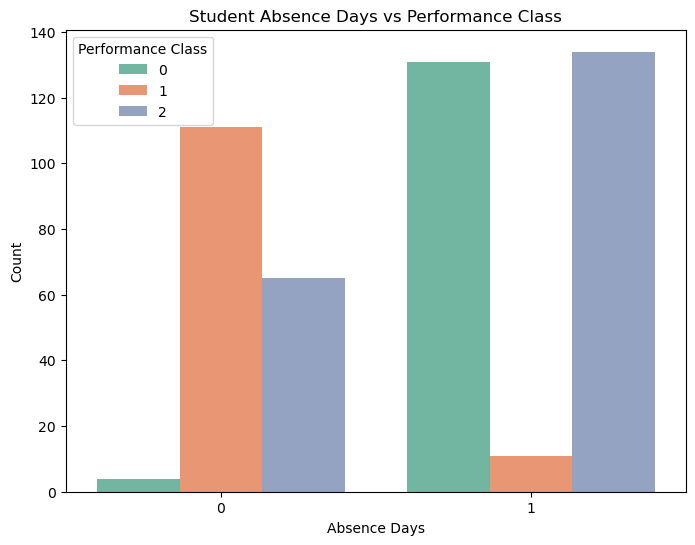

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dfc, x='StudentAbsenceDays', hue='Class', palette='Set2')
plt.title('Student Absence Days vs Performance Class')
plt.xlabel('Absence Days')
plt.ylabel('Count')
plt.legend(title='Performance Class')
plt.show()

# Recommendations

1. Focus on Engagement

    Schools should encourage classroom participation and resource utilization. Initiatives could include gamification of learning resources or providing timely announcements to engage students.

2. Promote Attendance

    Attendance-tracking systems could be implemented to identify students with high absenteeism. Providing additional support to these students might improve their performance.

3. Parental Programs

    Workshops or seminars for parents could help them understand their role in supporting student education. Increasing parental satisfaction with schools may indirectly boost student success.

4. Resource Allocation

    Allocate resources to grades and stages that show a higher dropout or lower performance rate. Data suggests that targeted interventions in specific grades might yield significant improvements.

5. Leverage Technology for Learning Continuity

    Provide a robust Learning Management System (LMS) that includes recorded lectures, downloadable resources, and discussion forums to ensure students can catch up remotely.